In [1]:
#저장된 이미지를 보여주기 위한..
from IPython.display import display, Image
from __future__ import print_function
#wordcloud
from wordcloud import create_cloud

In [2]:
try:
    from gensim import corpora, models, matutils
except:
    print("import gensim failed.")
    print()
    print("Please install it")
    raise

import matplotlib.pyplot as plt
import numpy as np
from os import path

NUM_TOPICS = 100

# Check that data exists
if not path.exists('./data/ap.dat'):
    print('Error: Expected data to be present at data/ap/')
    print('Please cd into ./data & run ./download_ap.sh')

# Load the data
corpus = corpora.BleiCorpus('./data/ap.dat', './data/vocab.txt')

# Build the topic model
model = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=None)

# Iterate over all the topics in the model
for ti in range(model.num_topics):
    words = model.show_topic(ti, 64)
    tf = sum(f for w, f in words)
    with open('topics.txt', 'w') as output:
        output.write('\n'.join('{}:{}'.format(w, int(1000. * f / tf)) for w, f in words))
        output.write("\n\n\n")

# We first identify the most discussed topic, i.e., the one with the
# highest total weight
topics = matutils.corpus2dense(model[corpus], num_terms=model.num_topics)
weight = topics.sum(1)
max_topic = weight.argmax()

In [3]:
# Get the top 64 words for this topic
# Without the argument, show_topic would return only 10 words
words = model.show_topic(max_topic, 64)

In [4]:
words[0:10]

[('i', 0.013714776149440394),
 ('people', 0.0049313724481310564),
 ('government', 0.004447332126554209),
 ('president', 0.004115814342883644),
 ('years', 0.0039103801189287659),
 ('states', 0.0036729385459305015),
 ('two', 0.0036479810001686036),
 ('arts', 0.0035884119228774543),
 ('united', 0.003558691443057213),
 ('nordstrom', 0.0035074141445073058)]

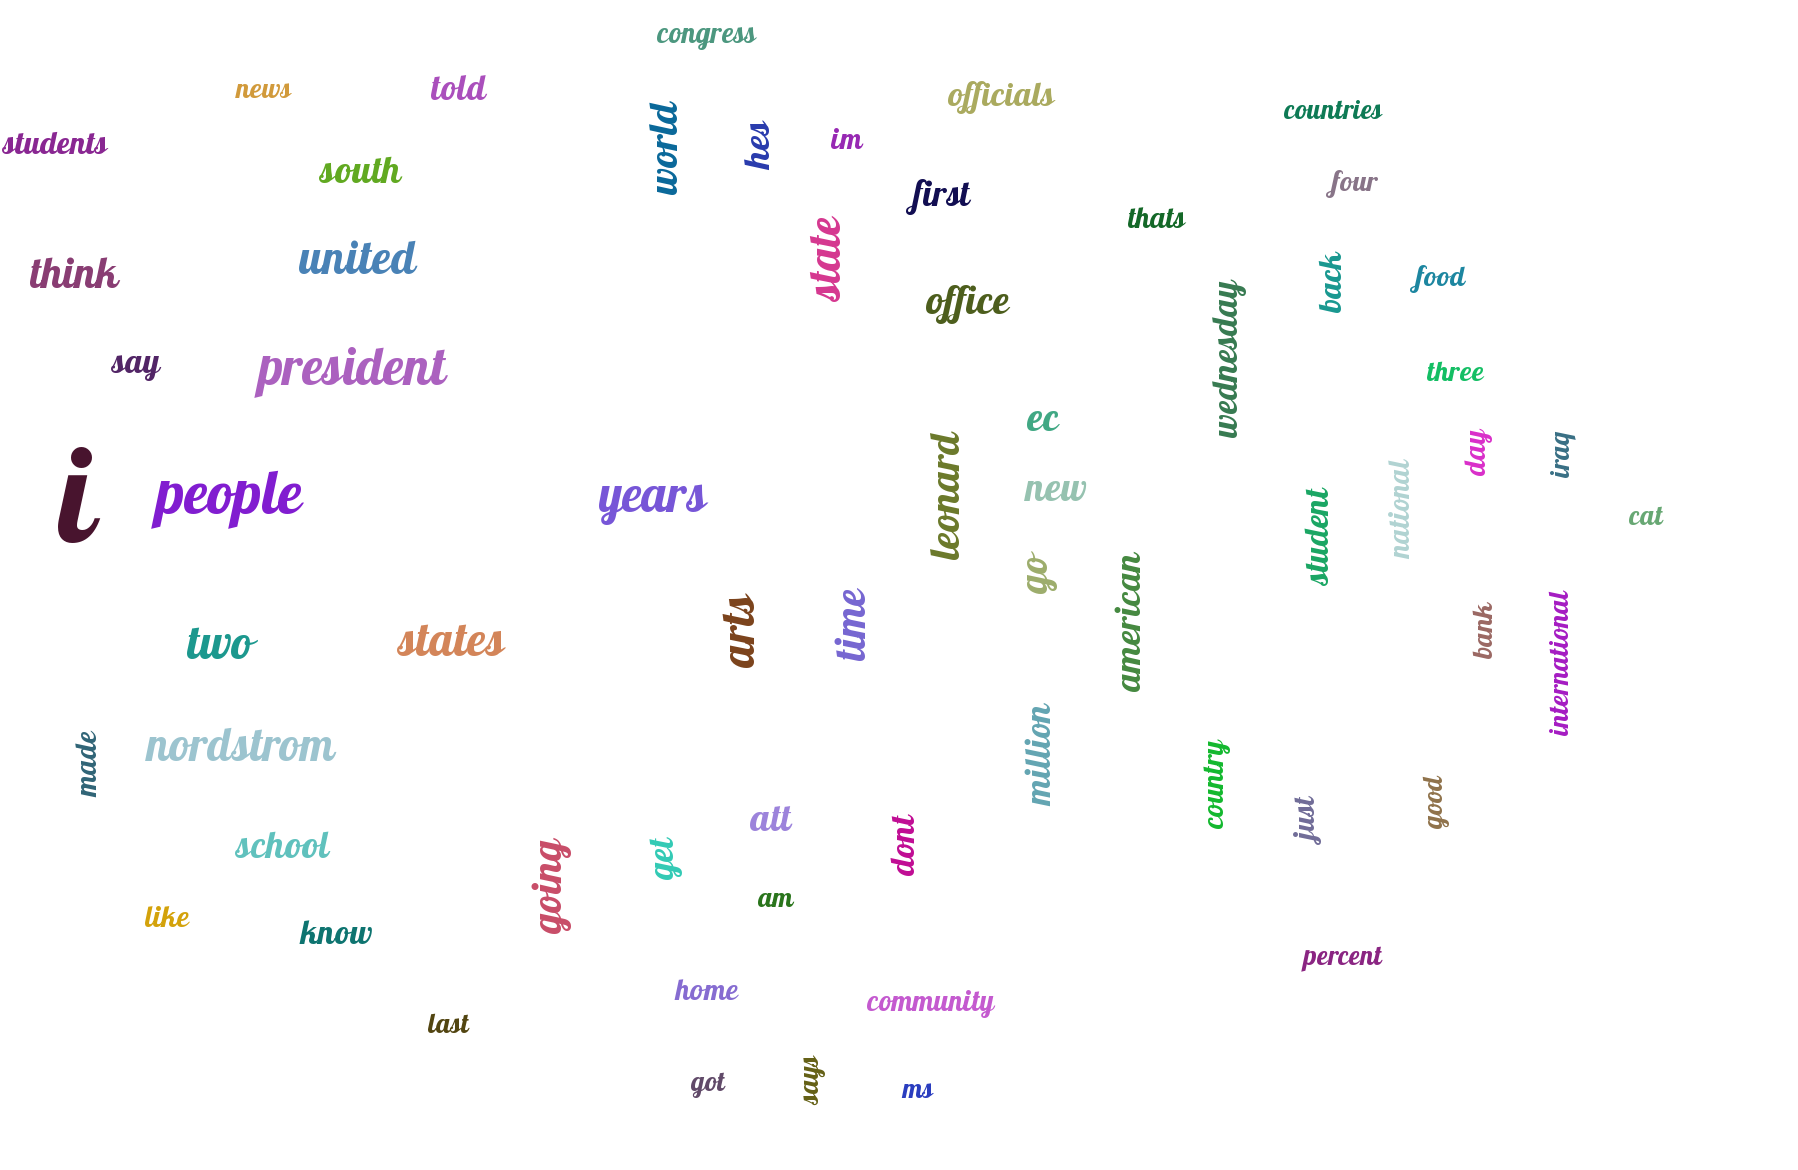

In [6]:
# This function will actually check for the presence of pytagcloud and is otherwise a no-op
create_cloud('charts/cloud_blei_lda.png', words)
display(Image(filename='charts/cloud_blei_lda.png'))

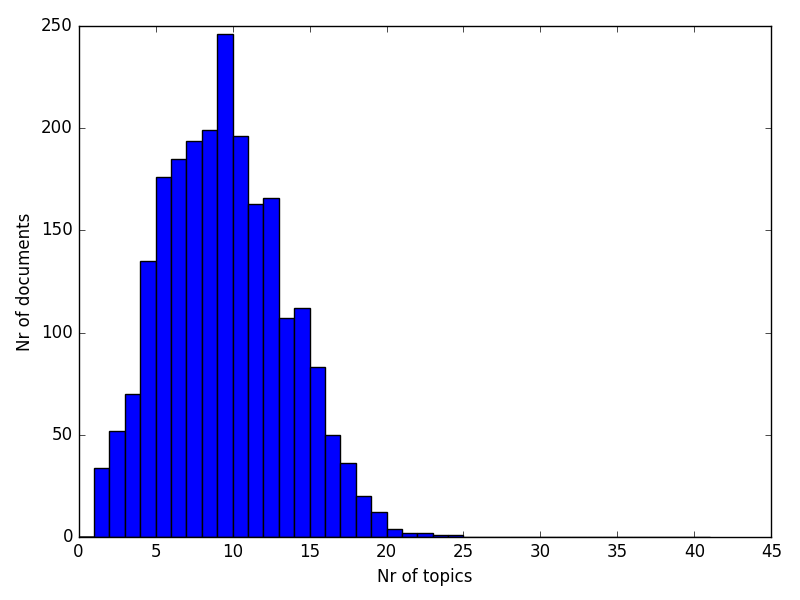

In [7]:
num_topics_used = [len(model[doc]) for doc in corpus]
fig,ax = plt.subplots()
ax.hist(num_topics_used, np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')
fig.tight_layout()
fig.savefig('charts/Figure_04_01.png')
display(Image(filename='charts/Figure_04_01.png'))

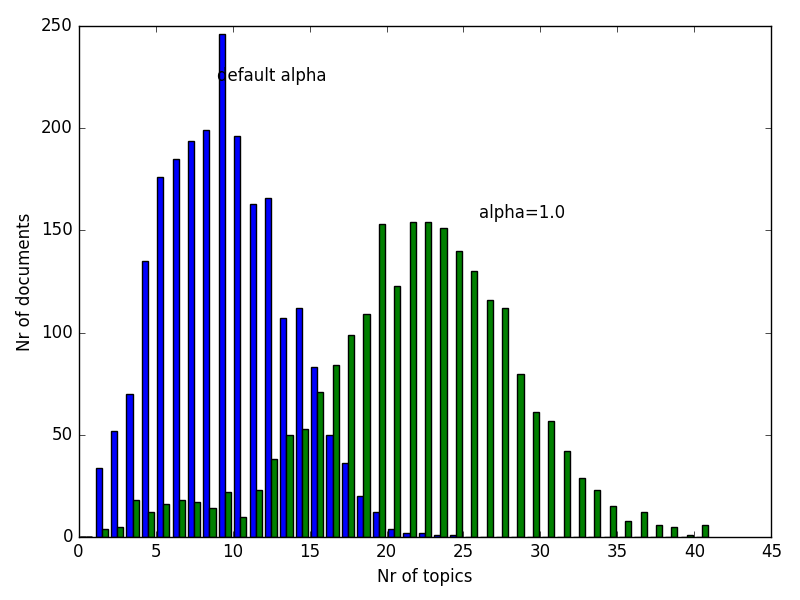

In [8]:
# Now, repeat the same exercise using alpha=1.0
# You can edit the constant below to play around with this parameter
ALPHA = 1.0

model1 = models.ldamodel.LdaModel(
    corpus, num_topics=NUM_TOPICS, id2word=corpus.id2word, alpha=ALPHA)
num_topics_used1 = [len(model1[doc]) for doc in corpus]

fig,ax = plt.subplots()
ax.hist([num_topics_used, num_topics_used1], np.arange(42))
ax.set_ylabel('Nr of documents')
ax.set_xlabel('Nr of topics')

# The coordinates below were fit by trial and error to look good
ax.text(9, 223, r'default alpha')
ax.text(26, 156, 'alpha=1.0')
fig.tight_layout()
fig.savefig('charts/Figure_04_02.png')
display(Image(filename='charts/Figure_04_02.png'))